In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator as o
from datetime import datetime
%matplotlib inline 

In [63]:
dateCols = ['Timestamp']
df = pd.read_csv("log.csv", parse_dates=dateCols)
df = df[df.EventType == 'start']
df['Day'] = df['Timestamp'].dt.weekday_name
df['Hour'] = df['Timestamp'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 1 to 6601
Data columns (total 7 columns):
CaseID       2201 non-null int64
Activity     2201 non-null object
EventType    2201 non-null object
Resource     2201 non-null object
Timestamp    2201 non-null datetime64[ns]
Day          2201 non-null object
Hour         2201 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 137.6+ KB


In [64]:
df.groupby(["EventType","Resource","Day"]).count()

CaseID  Activity  Timestamp  Hour
EventType Resource Day                                         
start     Role #1  Monday        207       207        207   207
                   Thursday      202       202        202   202
                   Tuesday       197       197        197   197
                   Wednesday     194       194        194   194
          Role #2  Monday        123       123        123   123
                   Thursday      174       174        174   174
                   Tuesday       186       186        186   186
                   Wednesday     120       120        120   120
          Role #3  Monday         37        37         37    37
                   Thursday       72        72         72    72
                   Wednesday     289       289        289   289
          Role #4  Friday        100       100        100   100
                   Thursday       97        97         97    97
                   Tuesday       101       101        101   101
                   Wednesday     102       102        102   102

In [65]:
df.groupby(["EventType","Resource","Day","Hour"]).count()['CaseID']

EventType  Resource  Day        Hour
start      Role #1   Monday     2        54
                                3       106
                                4        47
                     Thursday   2        63
                                3       102
                                4        37
                     Tuesday    2        58
                                3       102
                                4        37
                     Wednesday  2        62
                                3        97
                                4        35
           Role #2   Monday     3        17
                                4        73
                                5        33
                     Thursday   2         4
                                3        30
                                4        69
                                5        55
                                6        16
                     Tuesday    2         4
                                3      

In [49]:
df.sort_values(by=['Timestamp']).head(10)

,CaseID,Activity,EventType,Resource,Timestamp,Day,Hour
4232,49,Activity 1,complete,Role #1,2020-01-21 03:50:32.609,Tuesday,3
2927,51,Activity 1,complete,Role #1,2020-01-22 02:09:36.171,Wednesday,2
2879,50,Activity 1,complete,Role #1,2020-01-22 02:16:53.430,Wednesday,2
3869,52,Activity 1,complete,Role #1,2020-01-22 02:23:57.182,Wednesday,2
3884,54,Activity 1,complete,Role #1,2020-01-22 02:40:04.453,Wednesday,2
3851,53,Activity 1,complete,Role #1,2020-01-22 02:41:34.368,Wednesday,2
3719,56,Activity 1,complete,Role #1,2020-01-22 02:54:55.508,Wednesday,2
3785,55,Activity 1,complete,Role #1,2020-01-22 03:01:38.368,Wednesday,3
3128,58,Activity 1,complete,Role #1,2020-01-22 03:24:48.210,Wednesday,3
3686,57,Activity 1,complete,Role #1,2020-01-22 03:27:41.956,Wednesday,3


In [37]:
df.sort_values(by=['Timestamp']).tail(10)

,CaseID,Activity,EventType,Resource,Timestamp
338,419,Activity 8,complete,Role #4,2020-06-04 07:48:01.147
1823,429,Activity 8,complete,Role #4,2020-06-04 08:37:49.243
509,435,Activity 8,complete,Role #4,2020-06-05 05:17:48.047
986,443,Activity 8,complete,Role #4,2020-06-05 05:32:13.975
5699,438,Activity 8,complete,Role #4,2020-06-05 05:52:36.958
6161,434,Activity 8,complete,Role #4,2020-06-05 06:09:35.564
6047,427,Activity 8,complete,Role #4,2020-06-05 07:03:53.473
1373,439,Activity 8,complete,Role #4,2020-06-05 07:40:36.174
845,446,Activity 8,complete,Role #4,2020-06-09 05:11:58.416
5264,445,Activity 8,complete,Role #4,2020-06-09 05:20:47.559


In [38]:
days_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
roles_list = ['Role #1','Role #2','Role #3', 'Role #4']
hour_list = range(24)

In [39]:
# cartesian product
dict_keys = [(role,day,hour) for role in roles_list for day in days_list for hour in hour_list]
new_range = [0] * len(dict_keys)
day_counter_map = dict(zip(dict_keys, new_range))
day_counter_map

{('Role #1', 'Monday', 0): 0,
 ('Role #1', 'Monday', 1): 0,
 ('Role #1', 'Monday', 2): 0,
 ('Role #1', 'Monday', 3): 0,
 ('Role #1', 'Monday', 4): 0,
 ('Role #1', 'Monday', 5): 0,
 ('Role #1', 'Monday', 6): 0,
 ('Role #1', 'Monday', 7): 0,
 ('Role #1', 'Monday', 8): 0,
 ('Role #1', 'Monday', 9): 0,
 ('Role #1', 'Monday', 10): 0,
 ('Role #1', 'Monday', 11): 0,
 ('Role #1', 'Monday', 12): 0,
 ('Role #1', 'Monday', 13): 0,
 ('Role #1', 'Monday', 14): 0,
 ('Role #1', 'Monday', 15): 0,
 ('Role #1', 'Monday', 16): 0,
 ('Role #1', 'Monday', 17): 0,
 ('Role #1', 'Monday', 18): 0,
 ('Role #1', 'Monday', 19): 0,
 ('Role #1', 'Monday', 20): 0,
 ('Role #1', 'Monday', 21): 0,
 ('Role #1', 'Monday', 22): 0,
 ('Role #1', 'Monday', 23): 0,
 ('Role #1', 'Tuesday', 0): 0,
 ('Role #1', 'Tuesday', 1): 0,
 ('Role #1', 'Tuesday', 2): 0,
 ('Role #1', 'Tuesday', 3): 0,
 ('Role #1', 'Tuesday', 4): 0,
 ('Role #1', 'Tuesday', 5): 0,
 ('Role #1', 'Tuesday', 6): 0,
 ('Role #1', 'Tuesday', 7): 0,
 ('Role #1', 'Tues

In [5]:
day_counter_map = { ("Role #1","Monday"):0,
                    ("Role #1","Tuesday"):0,
                    ("Role #1","Wednesday"):0,
                    ("Role #1","Thursday"):0,
                    ("Role #1","Friday"):0,
                    ("Role #1","Saturday"):0,
                    ("Role #1","Sunday"):0,
                    ("Role #2","Monday"):0,
                    ("Role #2","Tuesday"):0,
                    ("Role #2","Wednesday"):0,
                    ("Role #2","Thursday"):0,
                    ("Role #2","Friday"):0,
                    ("Role #2","Saturday"):0,
                    ("Role #2","Sunday"):0,
                    ("Role #3","Monday"):0,
                    ("Role #3","Tuesday"):0,
                    ("Role #3","Wednesday"):0,
                    ("Role #3","Thursday"):0,
                    ("Role #3","Friday"):0,
                    ("Role #3","Saturday"):0,
                    ("Role #3","Sunday"):0,
                    ("Role #4","Monday"):0,
                    ("Role #4","Tuesday"):0,
                    ("Role #4","Wednesday"):0,
                    ("Role #4","Thursday"):0,
                    ("Role #4","Friday"):0,
                    ("Role #4","Saturday"):0,
                    ("Role #4","Sunday"):0,
                                             }

In [40]:
for index, row in df.iterrows():
    role = row['Resource']
    day = row['Timestamp'].strftime("%A")
    hour = row['Timestamp'].hour
    tup = (role,day,hour)
    day_counter_map[tup] += 1  

In [41]:
day_counter_map
backup_map = day_counter_map
backup_map

{('Role #1', 'Monday', 0): 0,
 ('Role #1', 'Monday', 1): 0,
 ('Role #1', 'Monday', 2): 56,
 ('Role #1', 'Monday', 3): 104,
 ('Role #1', 'Monday', 4): 47,
 ('Role #1', 'Monday', 5): 0,
 ('Role #1', 'Monday', 6): 0,
 ('Role #1', 'Monday', 7): 0,
 ('Role #1', 'Monday', 8): 0,
 ('Role #1', 'Monday', 9): 0,
 ('Role #1', 'Monday', 10): 0,
 ('Role #1', 'Monday', 11): 0,
 ('Role #1', 'Monday', 12): 0,
 ('Role #1', 'Monday', 13): 0,
 ('Role #1', 'Monday', 14): 0,
 ('Role #1', 'Monday', 15): 0,
 ('Role #1', 'Monday', 16): 0,
 ('Role #1', 'Monday', 17): 0,
 ('Role #1', 'Monday', 18): 0,
 ('Role #1', 'Monday', 19): 0,
 ('Role #1', 'Monday', 20): 0,
 ('Role #1', 'Monday', 21): 0,
 ('Role #1', 'Monday', 22): 0,
 ('Role #1', 'Monday', 23): 0,
 ('Role #1', 'Tuesday', 0): 0,
 ('Role #1', 'Tuesday', 1): 0,
 ('Role #1', 'Tuesday', 2): 58,
 ('Role #1', 'Tuesday', 3): 102,
 ('Role #1', 'Tuesday', 4): 39,
 ('Role #1', 'Tuesday', 5): 0,
 ('Role #1', 'Tuesday', 6): 0,
 ('Role #1', 'Tuesday', 7): 0,
 ('Role #1

In [8]:
max_value = max(day_counter_map.values())
# min_threshold represents the labour of 7.5% on the max day, any less, should be considered an anomaly
min_threshold = int(max_value * .075)
min_threshold

62

In [9]:
non_working_days = []
for role_day, quantity in day_counter_map.items():
    if quantity <= min_threshold:
        non_working_days.append(role_day)
for day in non_working_days:
    day_counter_map.pop(day, None)
day_counter_map

{('Role #1', 'Monday'): 539,
 ('Role #1', 'Tuesday'): 579,
 ('Role #1', 'Wednesday'): 580,
 ('Role #1', 'Thursday'): 604,
 ('Role #1', 'Friday'): 98,
 ('Role #2', 'Monday'): 369,
 ('Role #2', 'Tuesday'): 558,
 ('Role #2', 'Wednesday'): 360,
 ('Role #2', 'Thursday'): 522,
 ('Role #3', 'Monday'): 96,
 ('Role #3', 'Wednesday'): 834,
 ('Role #3', 'Thursday'): 216,
 ('Role #4', 'Tuesday'): 266,
 ('Role #4', 'Wednesday'): 405,
 ('Role #4', 'Thursday'): 289,
 ('Role #4', 'Friday'): 199}

In [10]:
days_worked = list(day_counter_map.values())
tuples = list(day_counter_map.keys())
roles = []
day_of_week = []
for tup in tuples:
    role, day = tup
    roles.append(role)
    day_of_week.append(day)
day_of_week

['Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Monday',
 'Wednesday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday']

In [11]:
data = {'Resource':roles, 'Weekday':day_of_week, 'Count':days_worked}
new_df = pd.DataFrame(data)
new_df

,Resource,Weekday,Count
0,Role #1,Monday,539
1,Role #1,Tuesday,579
2,Role #1,Wednesday,580
3,Role #1,Thursday,604
4,Role #1,Friday,98
5,Role #2,Monday,369
6,Role #2,Tuesday,558
7,Role #2,Wednesday,360
8,Role #2,Thursday,522
9,Role #3,Monday,96


Text(0, 0.5, 'Amount of days')

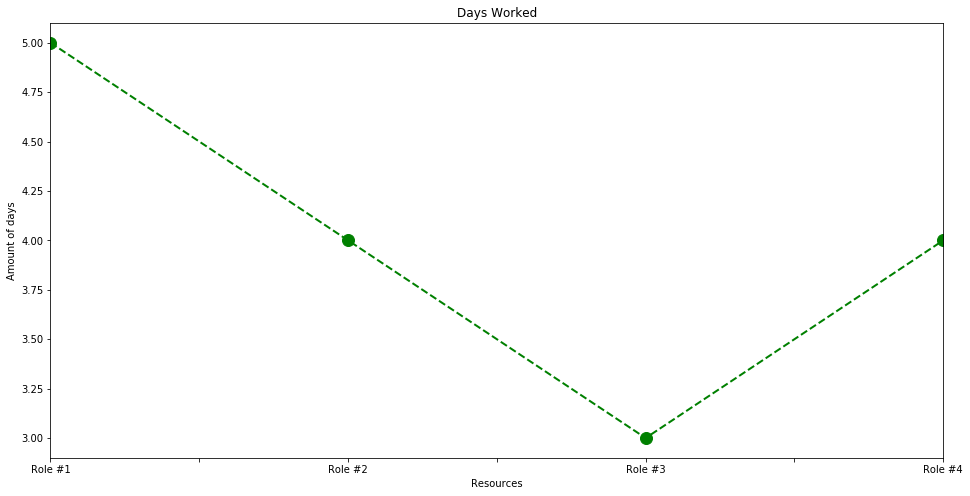

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
new_df.groupby(['Resource']).count()['Weekday'].plot(ax=ax,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('Days Worked')
plt.xlabel('Resources')
plt.ylabel('Amount of days')

Text(0, 0.5, 'Amount of days')

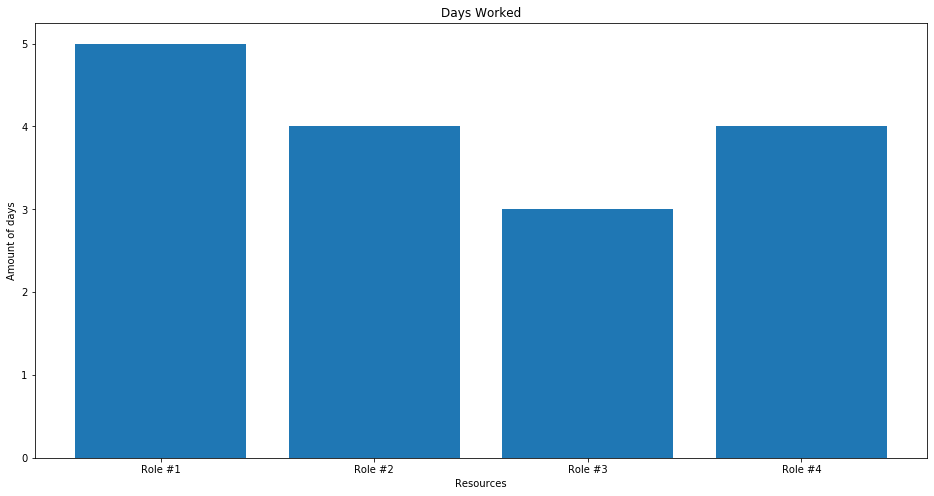

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
x_axis = ['Role #1','Role #2','Role #3','Role #4']
y_axis = new_df.groupby(['Resource']).count()['Weekday']
plt.bar(x_axis, y_axis)
plt.title('Days Worked')
plt.xlabel('Resources')
plt.ylabel('Amount of days')

In [14]:

dpoints = np.array([['Role #1', 'Monday', 539],
 ['Role #1', 'Tuesday', 579],
 ['Role #1', 'Wednesday', 580],
 ['Role #1', 'Thursday', 604],
 ['Role #1', 'Friday', 98],
 ['Role #1', 'Saturday', 0],
 ['Role #1', 'Sunday', 0],
 ['Role #2', 'Monday', 369],
 ['Role #2', 'Tuesday', 558],
 ['Role #2', 'Wednesday', 360],
 ['Role #2', 'Thursday', 522],
 ['Role #2', 'Friday', 0],
 ['Role #2', 'Saturday', 0],
 ['Role #2', 'Sunday', 0],
 ['Role #3', 'Monday', 96],
 ['Role #3', 'Tuesday', 48],
 ['Role #3', 'Wednesday', 834],
 ['Role #3', 'Thursday', 216],
 ['Role #3', 'Friday', 0],
 ['Role #3', 'Saturday', 0],
 ['Role #3', 'Sunday', 0],
 ['Role #4', 'Monday', 41],
 ['Role #4', 'Tuesday', 266],
 ['Role #4', 'Wednesday', 405],
 ['Role #4', 'Thursday', 289],
 ['Role #4', 'Friday', 199],
 ['Role #4', 'Saturday', 0],
 ['Role #4', 'Sunday', 0]])
dpoints

array([['Role #1', 'Monday', '539'],
       ['Role #1', 'Tuesday', '579'],
       ['Role #1', 'Wednesday', '580'],
       ['Role #1', 'Thursday', '604'],
       ['Role #1', 'Friday', '98'],
       ['Role #1', 'Saturday', '0'],
       ['Role #1', 'Sunday', '0'],
       ['Role #2', 'Monday', '369'],
       ['Role #2', 'Tuesday', '558'],
       ['Role #2', 'Wednesday', '360'],
       ['Role #2', 'Thursday', '522'],
       ['Role #2', 'Friday', '0'],
       ['Role #2', 'Saturday', '0'],
       ['Role #2', 'Sunday', '0'],
       ['Role #3', 'Monday', '96'],
       ['Role #3', 'Tuesday', '48'],
       ['Role #3', 'Wednesday', '834'],
       ['Role #3', 'Thursday', '216'],
       ['Role #3', 'Friday', '0'],
       ['Role #3', 'Saturday', '0'],
       ['Role #3', 'Sunday', '0'],
       ['Role #4', 'Monday', '41'],
       ['Role #4', 'Tuesday', '266'],
       ['Role #4', 'Wednesday', '405'],
       ['Role #4', 'Thursday', '289'],
       ['Role #4', 'Friday', '199'],
       ['Role #4', 'Saturday

In [15]:
def barplot(ax, dpoints):
    # Aggregate the conditions and the categories according to their mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]
    # sort the conditions, categories and data so that the bars in the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]
    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        ax.bar(pos, vals, width=width, label=cond, color=cm.Accent(float(i) / n))
    ax.set_xticks(indeces)
    ax.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=90)
    ax.set_ylabel("Quantity of Work")
    ax.set_xlabel("Days")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left')

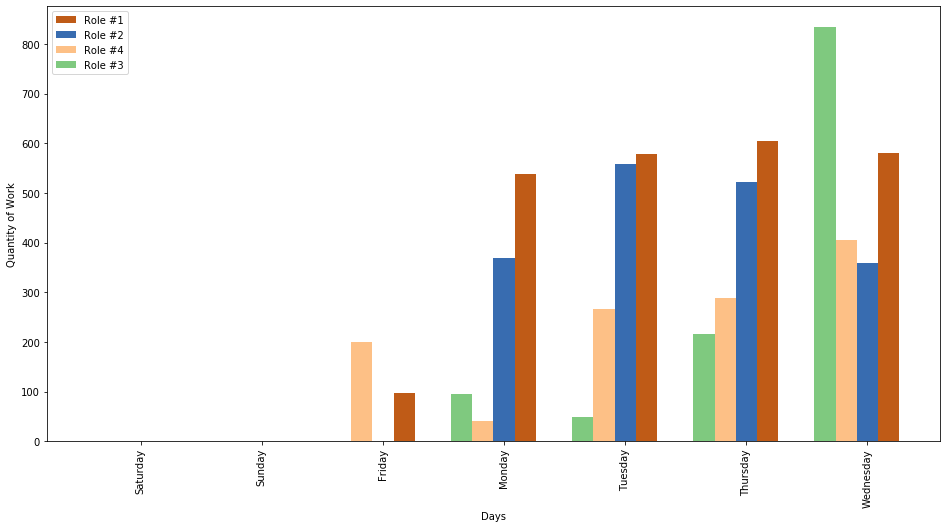

In [16]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
barplot(ax, dpoints)
fig.savefig("workdays.png")
plt.show()